# How to Train YOLOv9 on a Custom Dataset
---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/train-yolov9-model/)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/WongKinYiu/yolov9)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/XHT2c8jT3Bc)
[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Thu May 30 02:06:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.08             Driver Version: 535.161.08   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           On  | 00000000:00:1E.0 Off |                    0 |
| N/A   33C    P0              22W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/ec2-user/my/repo/github/assignment15-yolov9


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [3]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

fatal: destination path 'yolov9' already exists and is not an empty directory.
/home/ec2-user/my/repo/github/assignment15-yolov9/yolov9


**NOTE:** Let's install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

In [9]:
!pip install -q roboflow

## Download model weights

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [14]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [4]:
!ls -la {HOME}/weights

total 402432
drwxrwxr-x 2 ec2-user ec2-user        80 May 30 02:00 .
drwxrwxr-x 6 ec2-user ec2-user       170 May 30 02:05 ..
-rw-rw-r-- 1 ec2-user ec2-user  51508261 Feb 18 12:36 gelan-c.pt
-rw-rw-r-- 1 ec2-user ec2-user 117203713 Feb 18 12:36 gelan-e.pt
-rw-rw-r-- 1 ec2-user ec2-user 103153312 Feb 18 12:36 yolov9-c.pt
-rw-rw-r-- 1 ec2-user ec2-user 140217688 Feb 18 12:36 yolov9-e.pt


## Download example data

**NOTE:** If you want to run inference using your own file as input, simply upload image to Google Colab and update `SOURCE_IMAGE_PATH` with the path leading to your file.

In [5]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [6]:
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

## Detection with pre-trained COCO model

### gelan-c

In [7]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/home/ec2-user/my/repo/github/assignment15-yolov9/weights/gelan-c.pt'], source=/home/ec2-user/my/repo/github/assignment15-yolov9/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2024-5-30 Python-3.10.14 torch-2.2.0 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /home/ec2-user/my/repo/github/assignment15-yolov9/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 192.9ms
Speed: 0.4ms pre-process, 192.9ms inference, 580.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

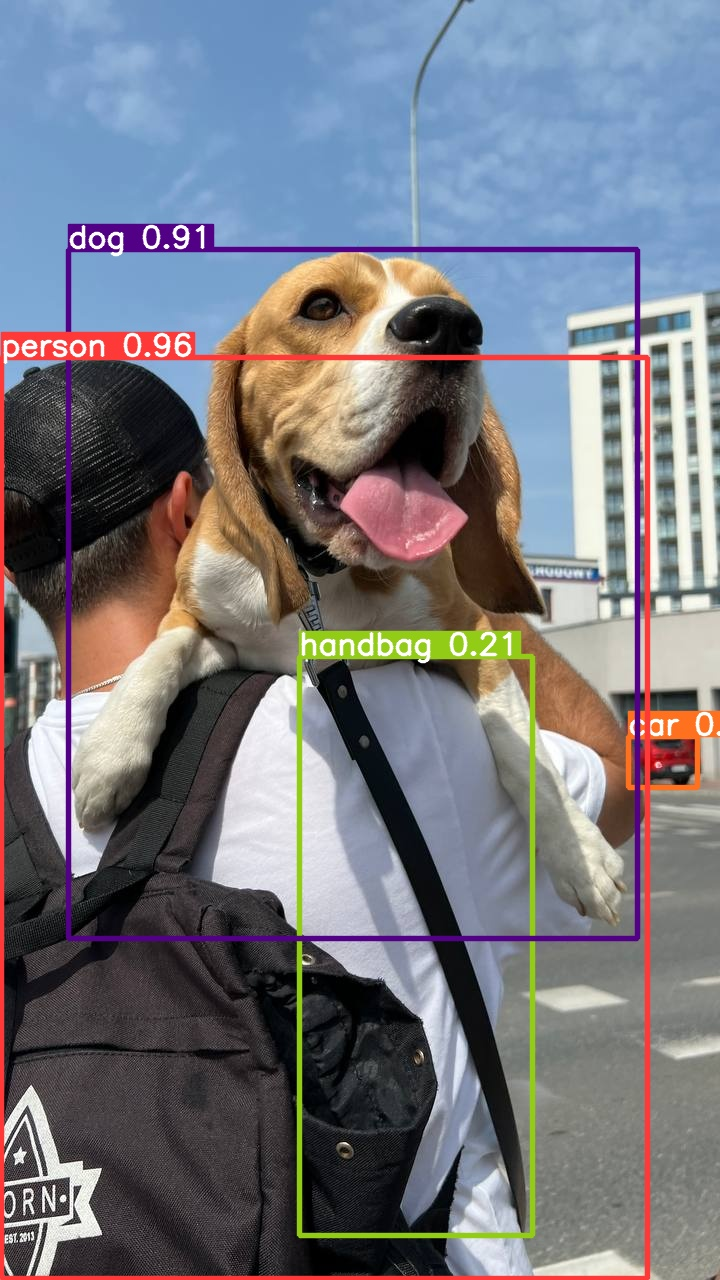

In [8]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/dog.jpeg", width=600)

## yolov9-e

In [9]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/home/ec2-user/my/repo/github/assignment15-yolov9/weights/yolov9-e.pt'], source=/home/ec2-user/my/repo/github/assignment15-yolov9/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2024-5-30 Python-3.10.14 torch-2.2.0 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /home/ec2-user/my/repo/github/assignment15-yolov9/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 263.3ms
Speed: 0.4ms pre-process, 263.3ms inference, 591.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/ex

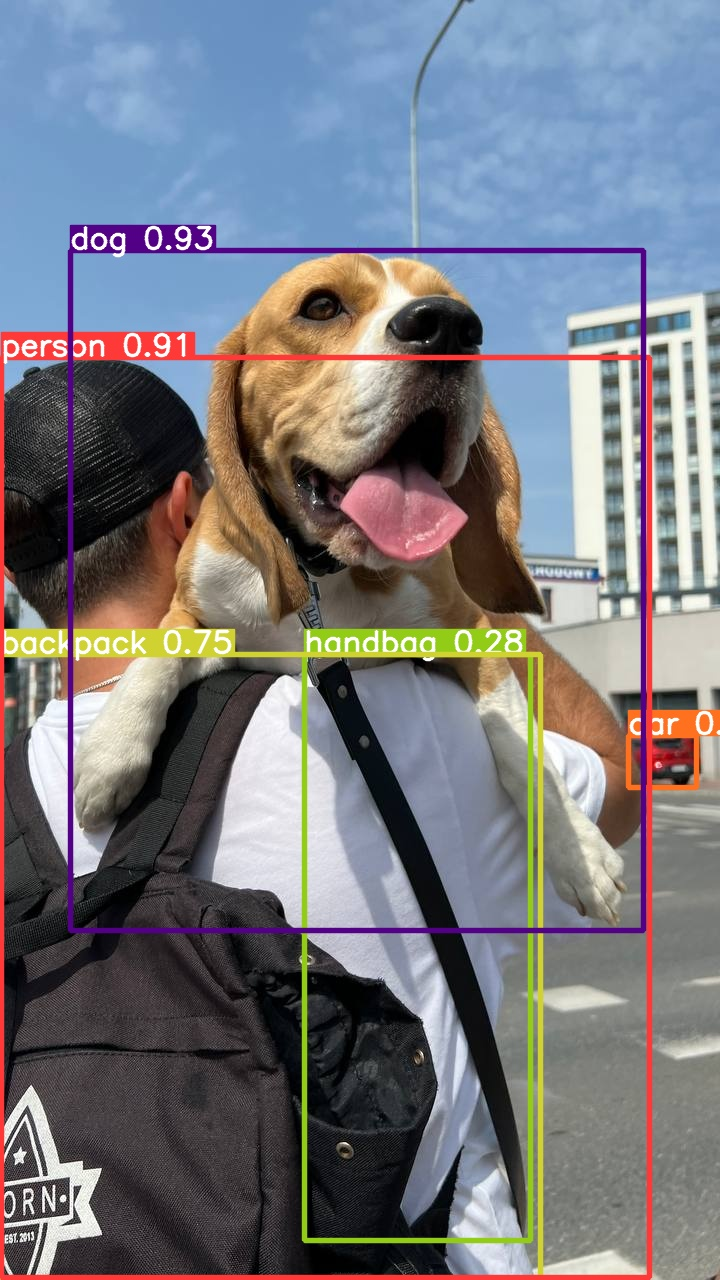

In [10]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp2/dog.jpeg", width=600)

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [11]:
%cd {HOME}/yolov9

/home/ec2-user/my/repo/github/assignment15-yolov9/yolov9


**NOTE:** In this tutorial, I will use the [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) dataset. Feel free to replace it with your dataset in YOLO format or use another dataset available on [Roboflow Universe](https://universe.roboflow.com). Additionally, if you plan to deploy your model to Roboflow after training, make sure you are the owner of the dataset and that no model is associated with the version of the dataset you are going to training on.

In [ ]:
# import roboflow

# roboflow.login()

# rf = roboflow.Roboflow()

# project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
# version = project.version(8)
# dataset = version.download("yolov9")

## Train Custom Model

In [15]:
%cd {HOME}/yolov9
!python train.py --workers 8 --device 0 --batch 16\
--data {HOME}/data/football-players/data.yaml\
--img 640\
--cfg models/detect/gelan-c.yaml\
--weights {HOME}/weights/gelan-c.pt\
--hyp hyp.scratch-high.yaml\
--min-items 0\
--epochs 25\
--close-mosaic 15


# train gelan models
# python train.py --workers 8 --device 0 --batch 32 --data data/coco.yaml --img 640 --cfg models/detect/gelan-c.yaml --weights '' --name gelan-c --hyp hyp.scratch-high.yaml --min-items 0 --epochs 500 --close-mosaic 15


/home/ec2-user/my/repo/github/assignment15-yolov9/yolov9


train: weights=/home/ec2-user/my/repo/github/assignment15-yolov9/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/home/ec2-user/my/repo/github/assignment15-yolov9/data/football-players/data.yaml, hyp=hyp.scratch-high.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5 🚀 2024-5-30 Python-3.10.14 torch-2.2.0 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, w

In [ ]:
# %cd {HOME}/yolov9

# !python train.py \
# --batch 16 --epochs 2 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
# --data {dataset.location}/data.yaml \
# --weights {HOME}/weights/gelan-c.pt \
# --cfg models/detect/gelan-c.yaml \
# --hyp hyp.scratch-high.yaml

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [16]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png
events.out.tfevents.1717036158.ip-10-176-45-7.ec2.internal.25704.0
F1_curve.png
hyp.yaml
labels_correlogram.jpg
labels.jpg
opt.yaml
P_curve.png
PR_curve.png
R_curve.png
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
val_batch1_labels.jpg
val_batch1_pred.jpg
weights


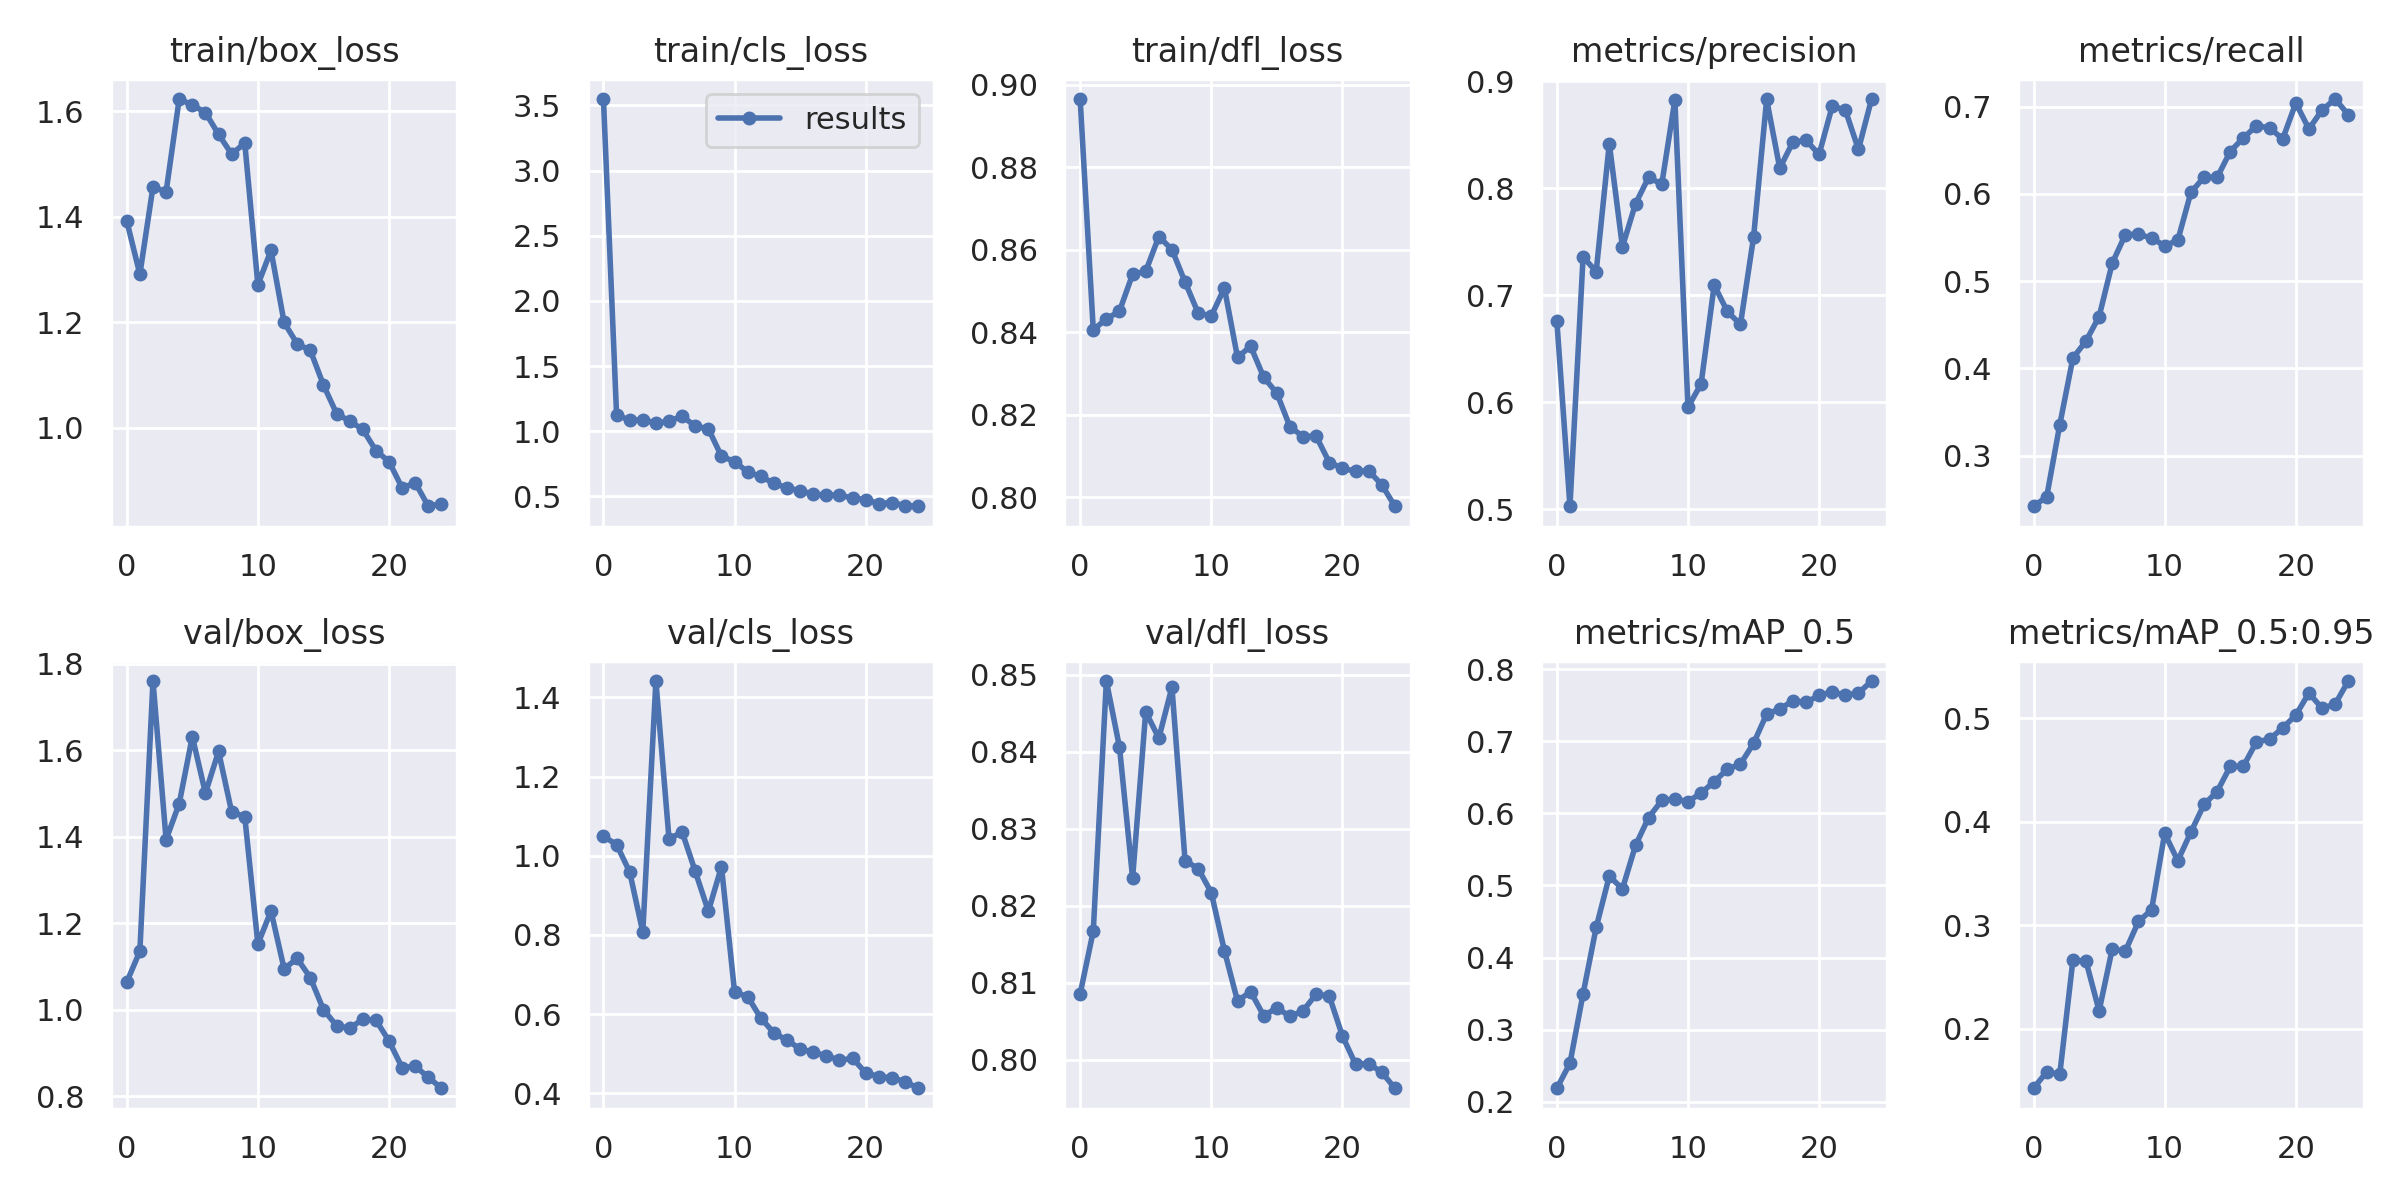

In [17]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

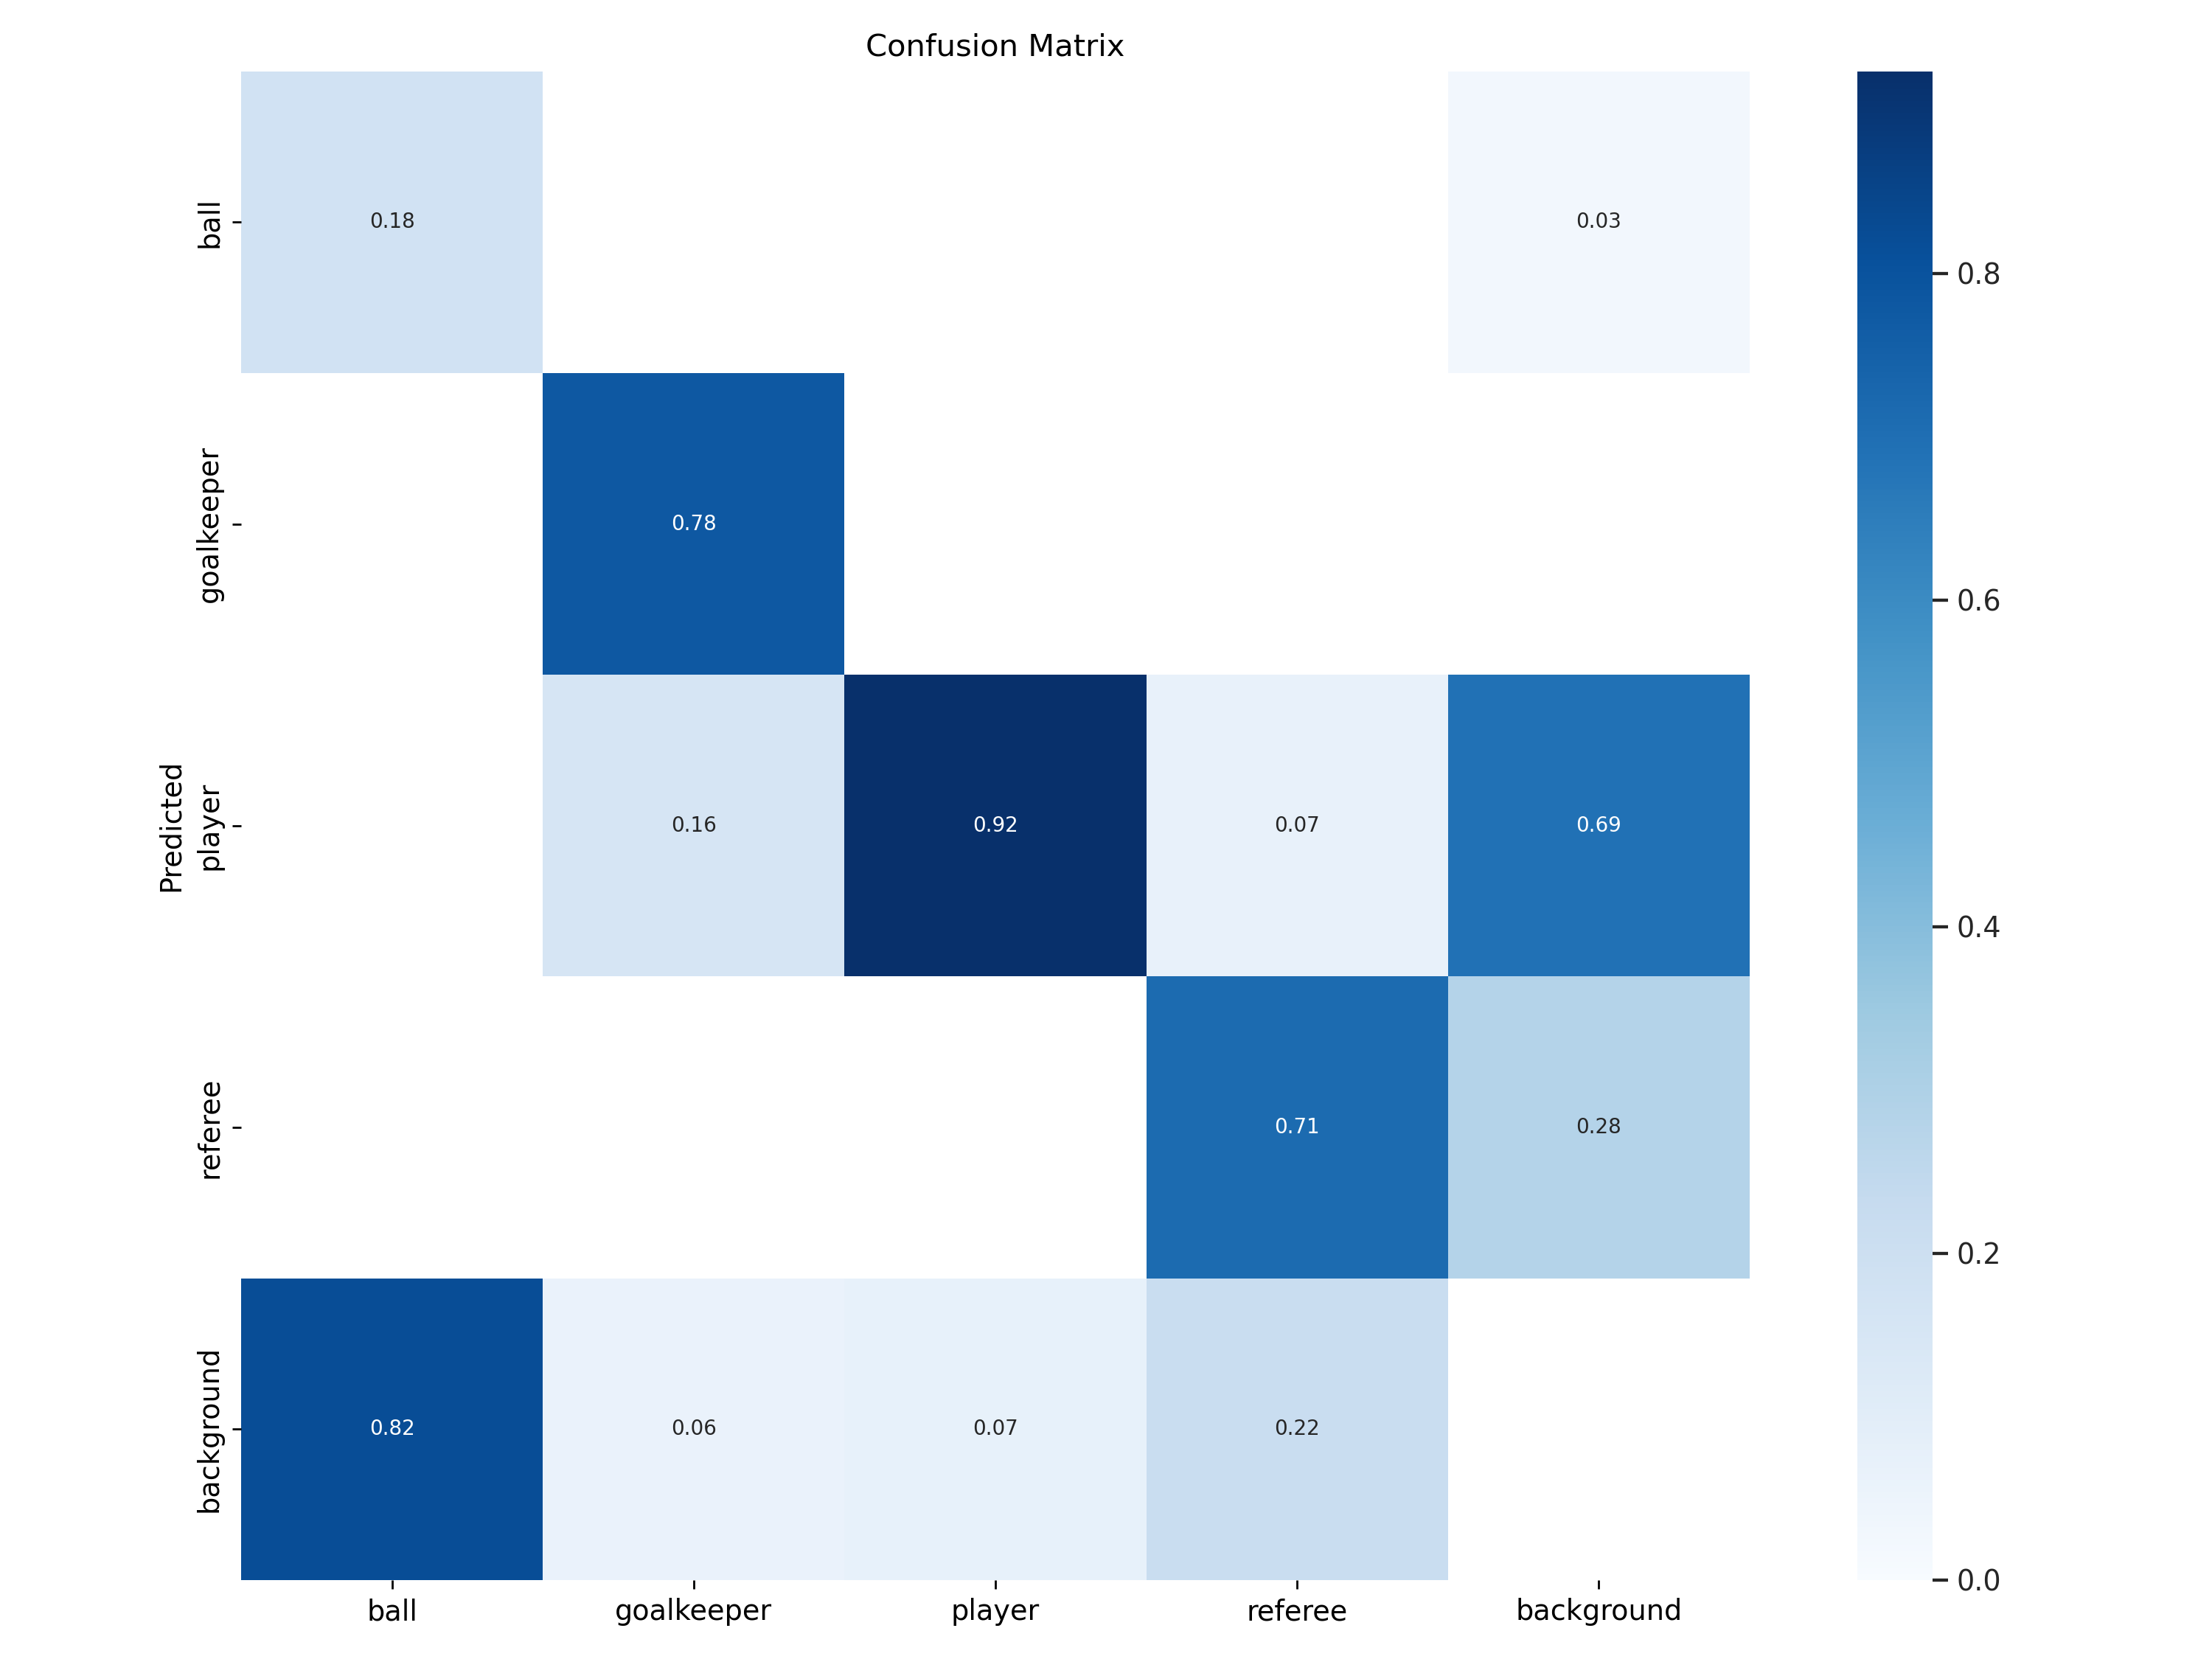

In [18]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

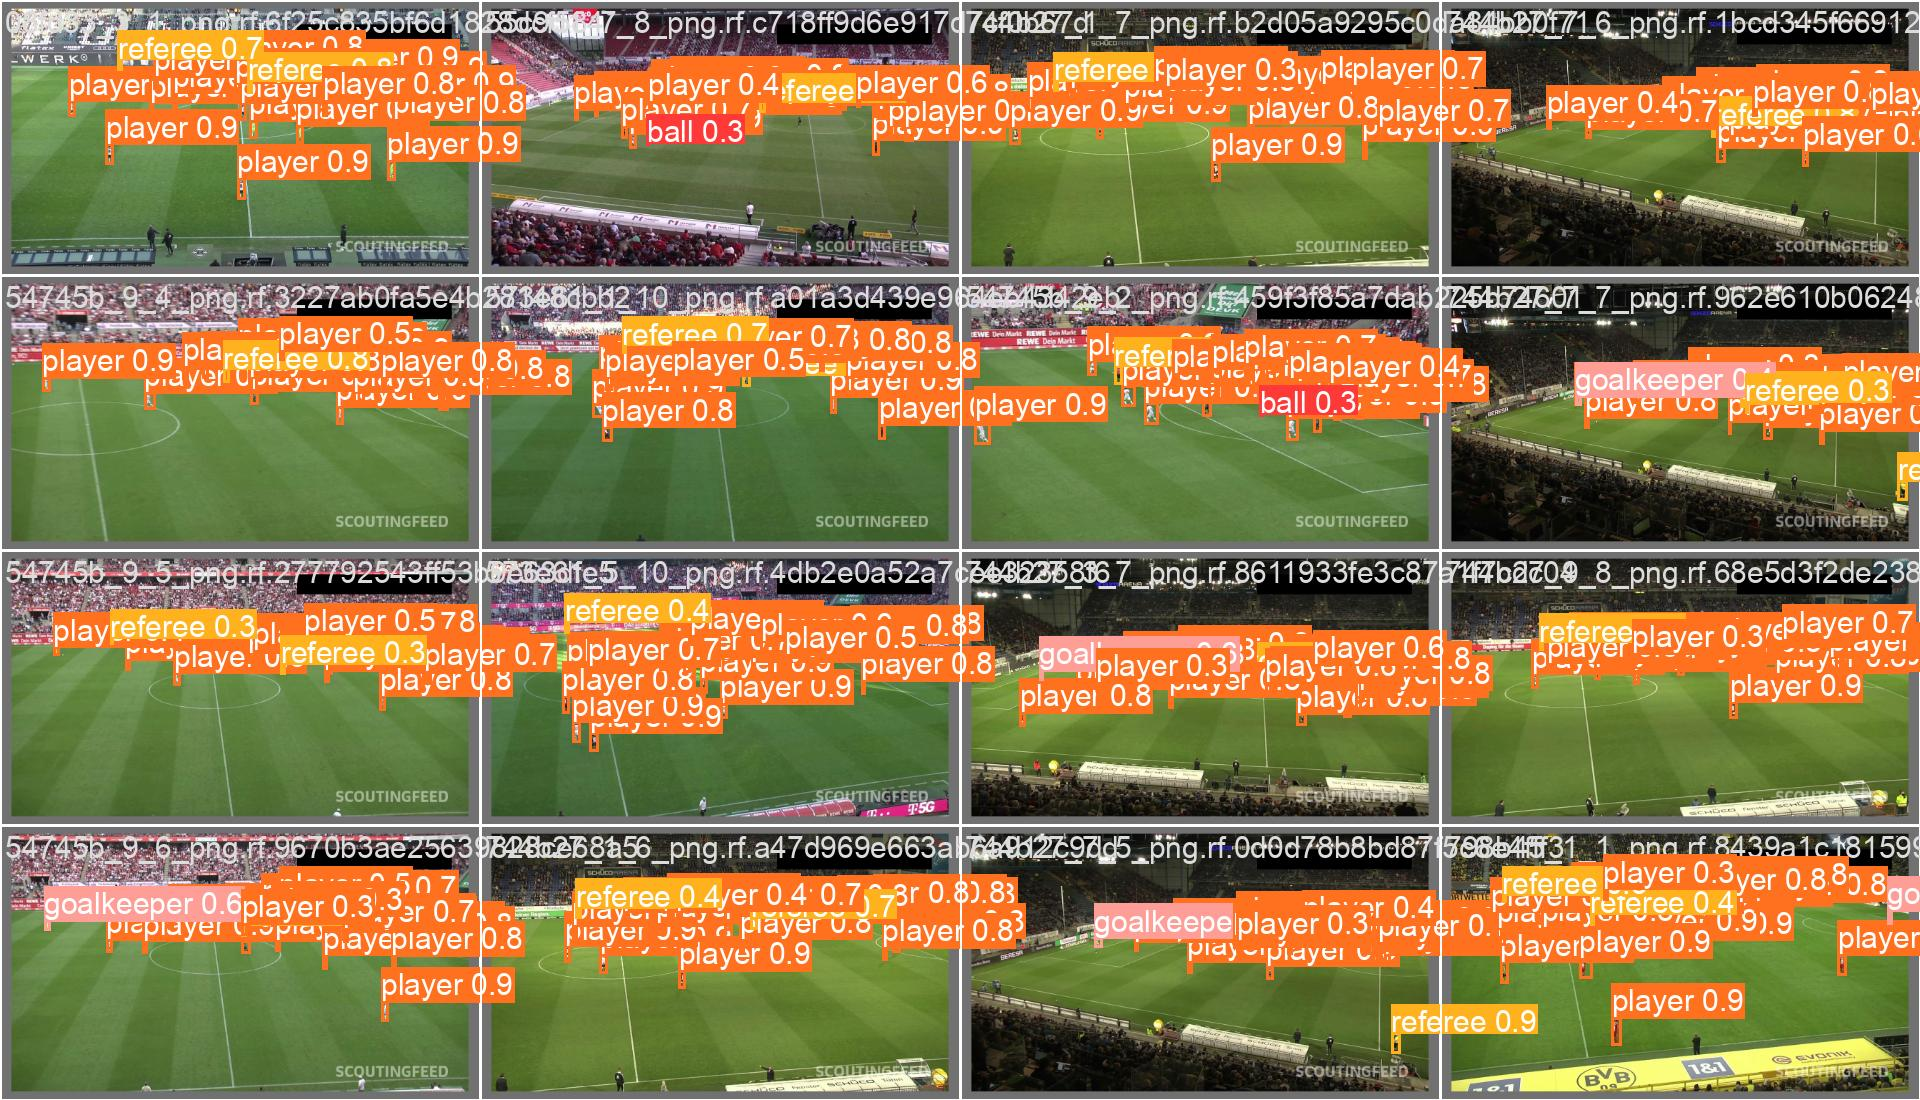

In [19]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [20]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {HOME}/data/football-players/data.yaml\
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/home/ec2-user/my/repo/github/assignment15-yolov9/yolov9
val: data=/home/ec2-user/my/repo/github/assignment15-yolov9/data/football-players/data.yaml, weights=['/home/ec2-user/my/repo/github/assignment15-yolov9/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 2024-5-30 Python-3.10.14 torch-2.2.0 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /home/ec2-user/my/repo/github/assignment15-yolov9/data/football-pl
                 Class     Images  Instances          P          R      mAP50   
                   all         43       1025      0.883       0.69      0.785      0.543
                  

In [21]:
# %cd {HOME}/yolov9

# !python val.py \
# --img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
# --data {dataset.location}/data.yaml \
# --weights {HOME}/yolov9/runs/train/exp/weights/best.pt

## Inference with Custom Model

In [22]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {HOME}/data/football-players/test/images

detect: weights=['/home/ec2-user/my/repo/github/assignment15-yolov9/yolov9/runs/train/exp/weights/best.pt'], source=/home/ec2-user/my/repo/github/assignment15-yolov9/data/football-players/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2024-5-30 Python-3.10.14 torch-2.2.0 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414044 parameters, 0 gradients, 102.5 GFLOPs
image 1/19 /home/ec2-user/my/repo/github/assignment15-yolov9/data/football-players/test/images/08fd33_3_6_png.rf.8be10169272238a48652496ad4824d2e.jpg: 736x1280 1 ball, 20 players, 2 referees, 188.8ms
image 2/19 /home/ec2-

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

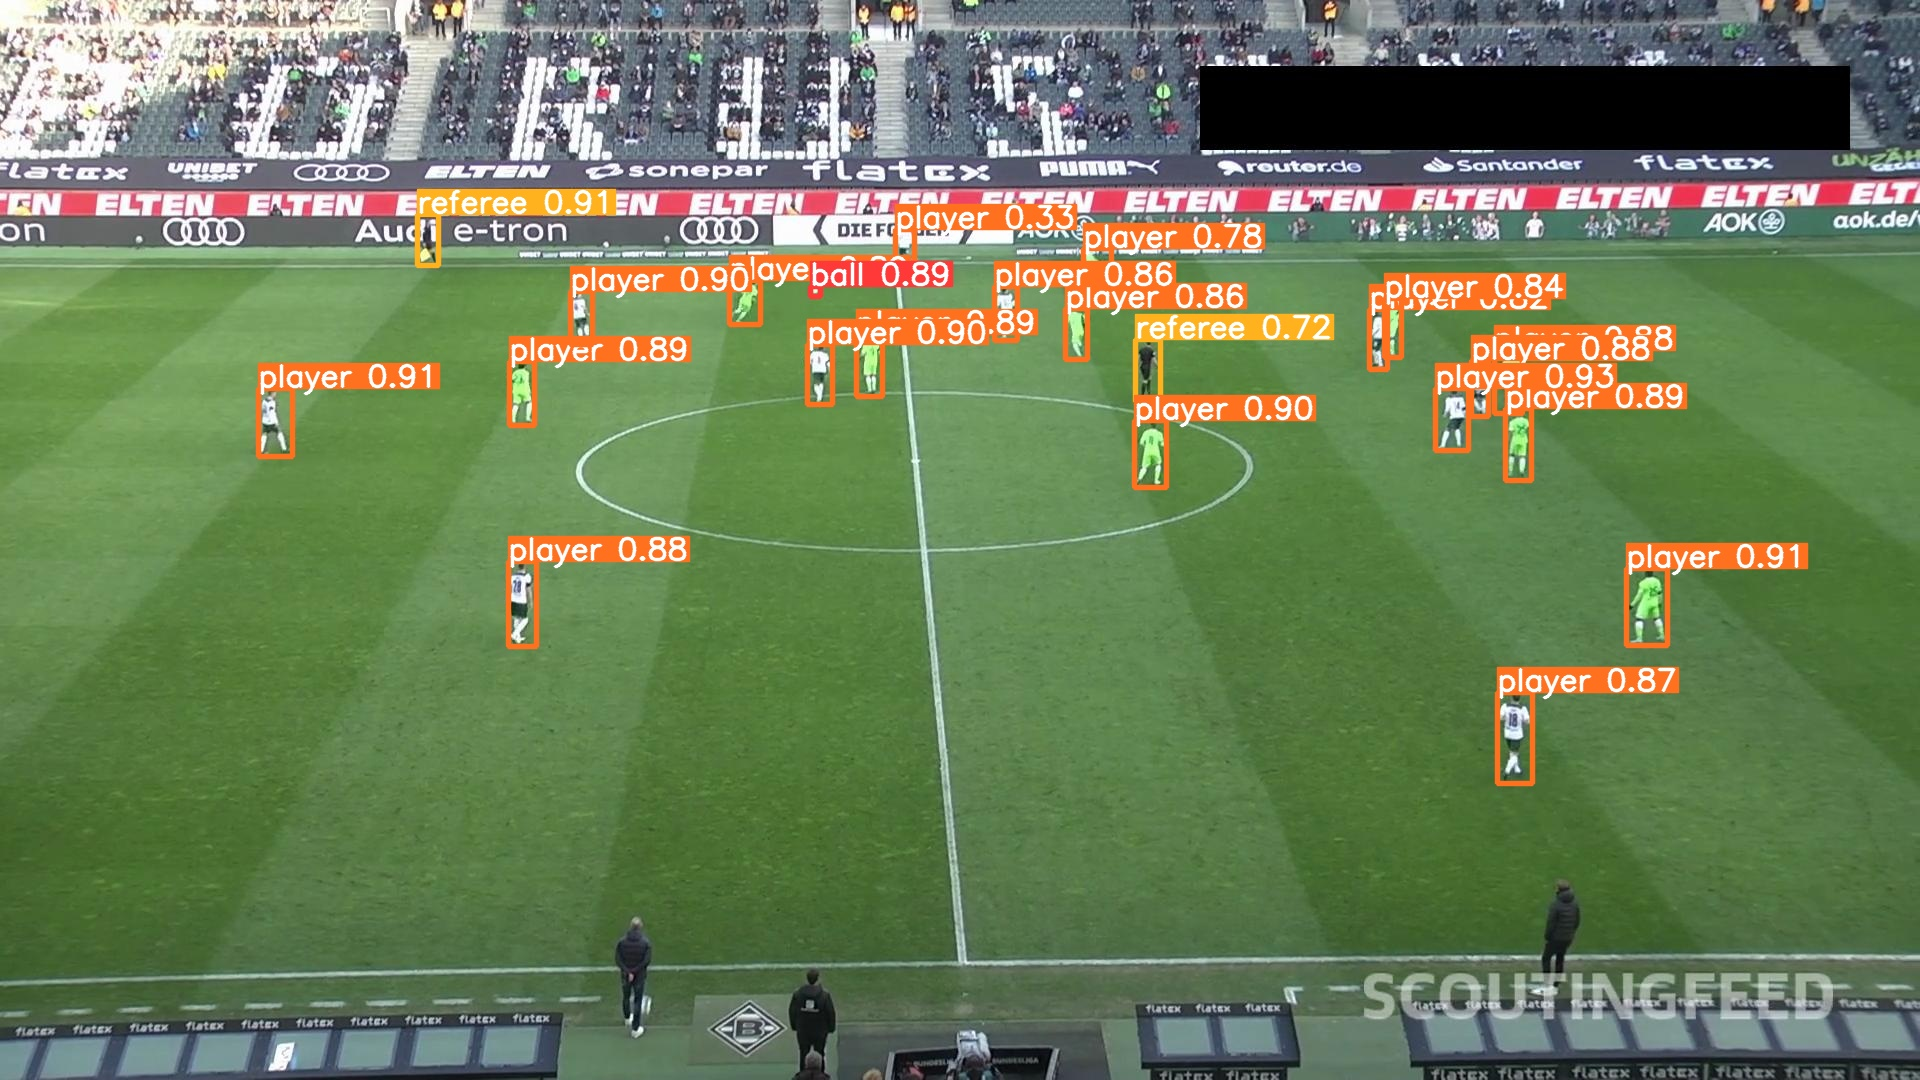

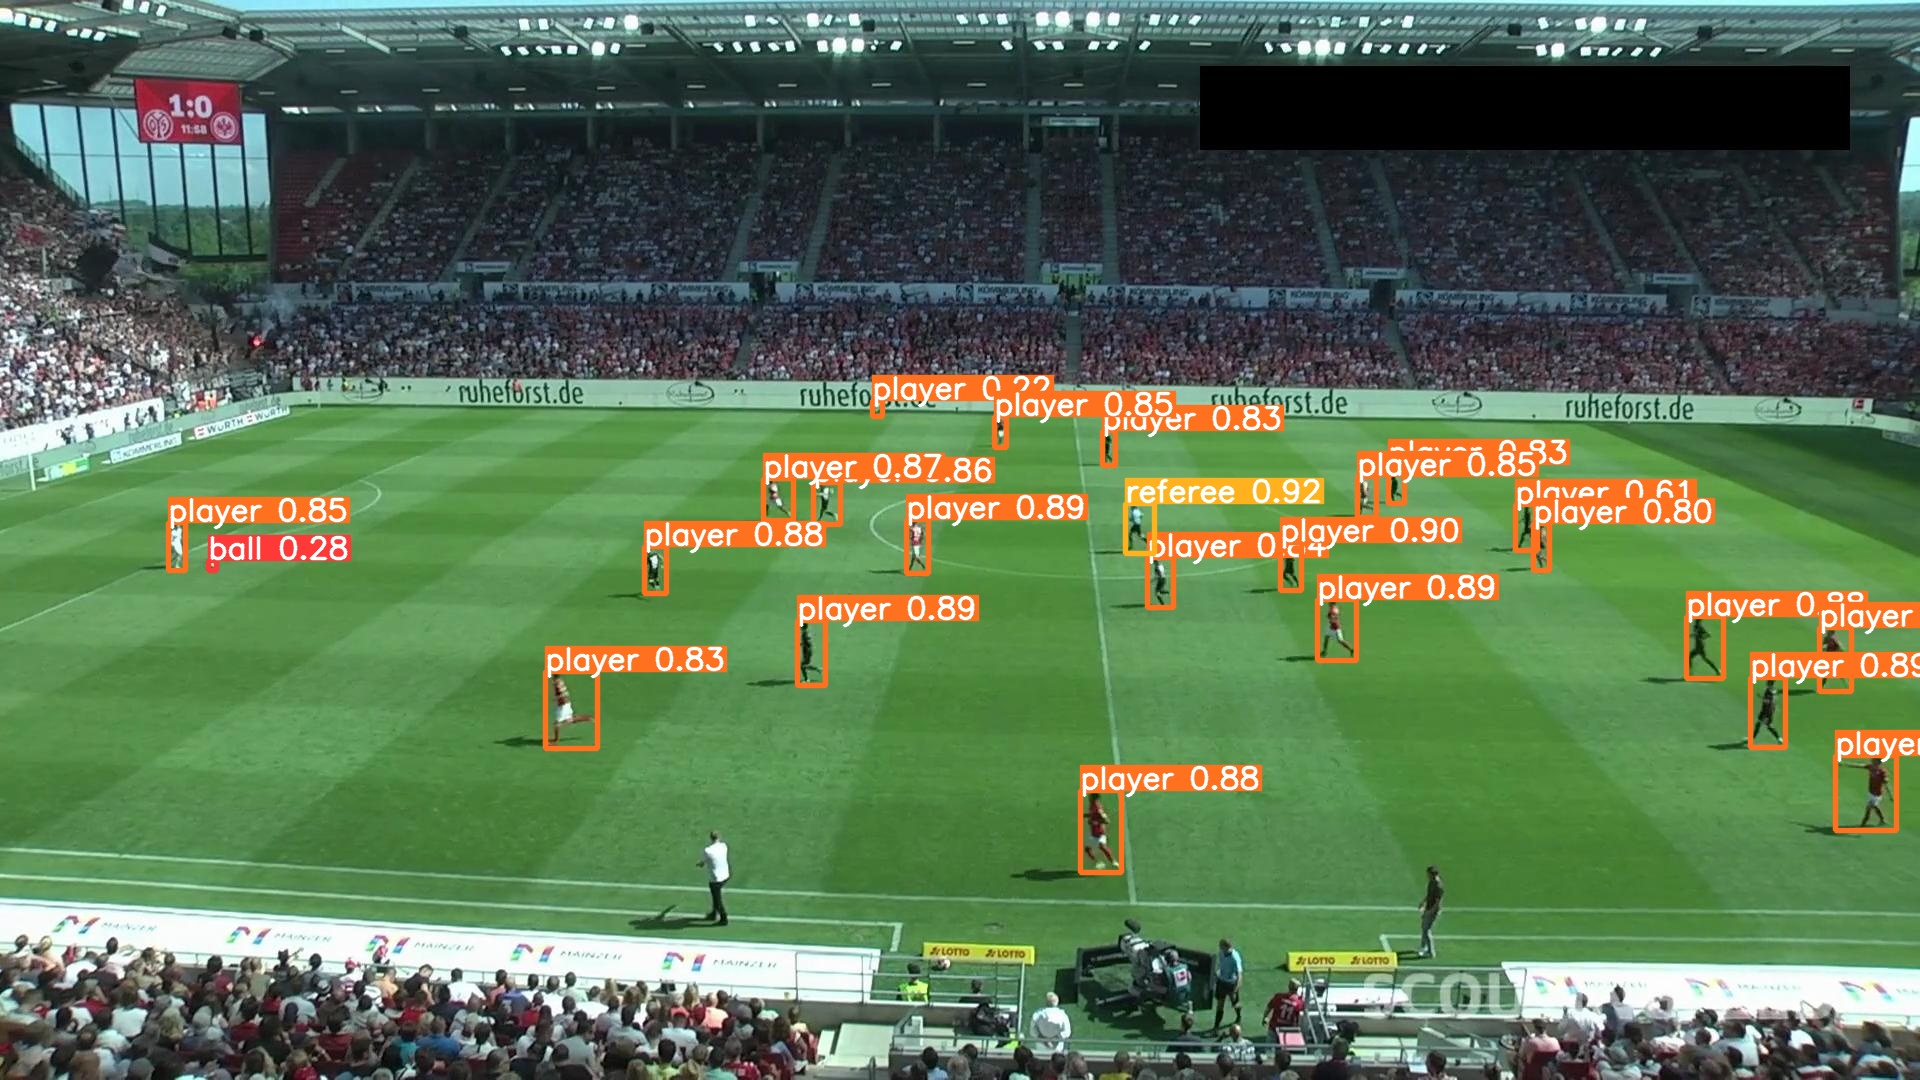

In [23]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp3/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

## BONUS: Deploy YOLOv9 Model with Inference

**NOTE:** To deploy the model and display inference results, we will need two additional packages - [`inference`](https://pypi.org/project/inference) and [`supervision`](https://pypi.org/project/supervision). Let's install and import them!

In [30]:
!pip install -q inference supervision

In [37]:
import cv2
import random
import getpass

import supervision as sv

from inference import get_model

%matplotlib inline

**NOTE:** Before using your model in Inference, you first need to upload your weights to Roboflow Universe. Ensure to specify the correct `model_type` - `yolov9`, and that the project version matches the version of the dataset you used for training, denoted by `[1]`. In my case, it's `6`.

![YOLOv9 Benchmark](https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/upload-roboflow-model.png)



In [28]:
# version.deploy(model_type="yolov9", model_path=f"{HOME}/yolov9/runs/train/exp")

**NOTE:** Now we can download our model anywhere using the assigned `model_id` denoted by `[2]`. In my case `football-players-detection-3zvbc/6`. To download the model you will need your [`ROBOFLOW_API_KEY`](https://docs.roboflow.com/api-reference/authentication).




In [29]:
# ROBOFLOW_API_KEY = getpass.getpass()

# model = get_model(model_id="football-players-detection-3zvbc/8", api_key=ROBOFLOW_API_KEY)

**NOTE:** Let's pick random image from our test subset and detect objects using newly fine-tuned model.

In [36]:
# image_paths = sv.list_files_with_extensions(
#     directory=f"{HOME}/data/football-players/test/images",
#     extensions=['png', 'jpg', 'jpeg']
# )
# image_path = random.choice(image_paths)
# image = cv2.imread(image_path)

# result = model.infer(image, confidence=0.1)[0]
# detections = sv.Detections.from_inference(result)

**NOTE:** Finally, let's use supervision and [annotate](https://supervision.roboflow.com/develop/annotators/) our results.

In [35]:
# label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
# bounding_box_annotator = sv.BoundingBoxAnnotator()

# annotated_image = image.copy()
# annotated_image = bounding_box_annotator.annotate(scene=annotated_image, detections=detections)
# annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# sv.plot_image(annotated_image)